# LAICA audio processing unit

This test file is based on <a href="https://pytorch.org/audio/stable/tutorials/audio_io_tutorial.html">this tutorial</a>.

# Importing and checking PyTorch

In [2]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

1.13.1
0.13.1


## Importing necessary libraries

In [3]:
import io
import os
import tarfile
import tempfile

import numpy as np
import pandas as pd

import boto3                        # This is needed for the AWS access... it's probably not needed
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import requests
from botocore import UNSIGNED       # See boto3
from botocore.config import Config  # See boto3
from IPython.display import Audio
from torchaudio.utils import download_asset


## Rename audio files

In [4]:
# Paths
growls_path = "snippets/growls"
barks_path = "snippets/barks"
whines_path = "snippets/whines"
f0_whines_path = "snippets/f0_whines"

'''#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#DO NOT RUN THIS CODE AGAIN, IT WILL OVERWRITE THE FILES IN THE FOLDER
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# List of .wav files
wav_files = [f for f in os.listdir(growls_path) if f.endswith(".wav")]

# Rename to "foldername_index.wav"
# CHANGE TO FUNCTION SO IT CAN BE CALLED ON ALL SOUND FOLDERS
for i, file_name in enumerate(wav_files, start=1):
    new_file_name = f"{os.path.basename(growls_path)}_{i:05}.wav"
    os.rename(os.path.join(growls_path, file_name),
              os.path.join(growls_path, new_file_name))
'''

'#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n#DO NOT RUN THIS CODE AGAIN, IT WILL OVERWRITE THE FILES IN THE FOLDER\n#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n\n# List of .wav files\nwav_files = [f for f in os.listdir(growls_path) if f.endswith(".wav")]\n\n# Rename to "foldername_index.wav"\n# CHANGE TO FUNCTION SO IT CAN BE CALLED ON ALL SOUND FOLDERS\nfor i, file_name in enumerate(wav_files, start=1):\n    new_file_name = f"{os.path.basename(growls_path)}_{i:05}.wav"\n    os.rename(os.path.join(growls_path, file_name),\n              os.path.join(growls_path, new_file_name))\n'

## Listing files

In [5]:
# LIST ALL FILES IN FOLDER
GROWLS = sorted([os.path.join(growls_path, f) for f in os.listdir(growls_path) if f.endswith(".wav")])

In [6]:
# Check number of files
num_files = len([f for f in os.listdir(growls_path) if f.endswith('.wav')])

# Assert that the list length is correct
assert len(GROWLS) == num_files

## Querying audio metadata

In [7]:
metadata = torchaudio.info(GROWLS[30])
sample_rate = metadata.sample_rate
num_frames = metadata.num_frames
num_channels = metadata.num_channels
bits_per_sample = metadata.bits_per_sample
encoding = metadata.encoding

print(f'Sample rate: {sample_rate}')
print(f'Number of frames: {num_frames}')
print(f'Number of channels: {num_channels}')
print(f'Bits per sample: {bits_per_sample}')
print(f'Encoding: {encoding}')
# Calculate clip lenght in seconds
print(f'Length: {num_frames/sample_rate:.2f} seconds')

Sample rate: 44100
Number of frames: 15465
Number of channels: 1
Bits per sample: 16
Encoding: PCM_S
Length: 0.35 seconds


## Loading audio

In [8]:
# Example of loading a file
waveform, sample_rate = torchaudio.load(GROWLS[2])

## Plotting waveform and spectrogram

In [9]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = np.arange(0, num_frames) / sample_rate

    fig = go.Figure()
    for c in range(num_channels):
        fig.add_trace(go.Scatter(x=time_axis, y=waveform[c], line=dict(color='#7E2F8E', width=1)))
        fig.update_yaxes(title_text=f"Amplitude")
        fig.update_xaxes(title_text='Time (s)')
    fig.update_layout(title=f"Waveform of {GROWLS[30]}", 
                      paper_bgcolor='rgba(255,255,255,1)', 
                      plot_bgcolor='rgba(255,255,255,0.7)',
                      font=dict(size=14),
                      xaxis=dict(gridcolor='#bdbdbd', linecolor='#636363', linewidth=1),
                      yaxis=dict(gridcolor='#bdbdbd', linecolor='#636363', linewidth=1),
                      hovermode='x')
    fig.show()


In [10]:
plot_waveform(waveform, sample_rate)

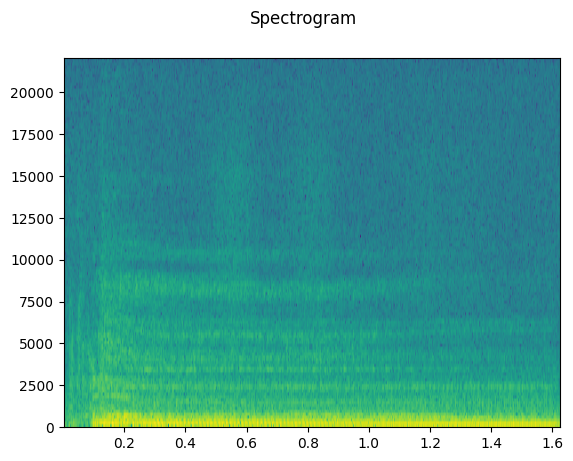

In [11]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show(block=False)
plot_specgram(waveform, sample_rate)

## Listen to the audio

In [85]:
Audio(waveform.numpy()[0], rate=sample_rate)